In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank-additional_bank-additional.csv',sep=';',encoding='utf-8')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [4]:
for column in df.columns:
    print(f'the values of {column} is {df[column].value_counts()}')

the values of age is age
32    216
31    191
30    177
34    174
35    172
     ... 
69      2
70      2
85      1
88      1
19      1
Name: count, Length: 67, dtype: int64
the values of job is job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64
the values of marital is marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64
the values of education is education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64
the values of default is default
no         3315
unknown     803
yes           1
Name: count, dtyp

In [5]:
for column in df.columns:
    for i in range(0,4119):
        if df[column].loc[i] == 'unknown':
            df[column].loc[i]=np.nan

In [6]:
df['job'].isna().sum()

39

In [7]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        if df[column].dtypes == 'object':
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].np.mean())


In [8]:
encoders={}
for column in df.columns:
    if df[column].dtypes=='object':
        le=LabelEncoder()
        df[column]=le.fit_transform(df[column])
        encoders[column] = le

In [9]:
df.dtypes

,0
age,int64
job,int64
marital,int64
education,int64
default,int64
housing,int64
loan,int64
contact,int64
month,int64
day_of_week,int64


In [10]:
df.corr(numeric_only=True)['y']

,y
age,0.060374
job,0.027752
marital,0.044900
education,0.066135
default,-0.005464
housing,-0.001006
loan,-0.010169
contact,-0.137401
month,0.005049
day_of_week,-0.006370


In [11]:
scale = StandardScaler()
df_scaled = scale.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.980752,-0.765207,-0.286575,-0.829632,-0.015583,0.898097,-0.438783,-0.743752,0.739737,-1.446809,...,-0.209228,0.201031,-0.351356,0.203199,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,-0.35065
1,-0.107991,0.922250,1.383017,-0.352762,-0.015583,-1.113465,-0.438783,1.344534,0.739737,-1.446809,...,0.569634,0.201031,-0.351356,0.203199,0.649441,0.715193,0.892269,0.711698,0.332862,-0.35065
2,-1.465619,0.922250,-0.286575,-0.352762,-0.015583,0.898097,-0.438783,1.344534,-0.127977,1.432827,...,-0.598660,0.201031,-0.351356,0.203199,0.841389,1.528273,-0.283172,0.773427,0.836535,-0.35065
3,-0.204965,0.922250,-0.286575,-0.829632,-0.015583,0.898097,-0.438783,1.344534,-0.127977,-1.446809,...,0.180203,0.201031,-0.351356,0.203199,0.841389,1.528273,-0.283172,0.771697,0.836535,-0.35065
4,0.667795,-1.046450,-0.286575,1.077851,-0.015583,0.898097,-0.438783,-0.743752,1.173594,-0.726900,...,-0.598660,0.201031,-0.351356,0.203199,-0.118350,-0.655478,-0.326707,0.328632,0.398028,-0.35065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,-0.980752,-1.046450,-0.286575,-1.306503,-0.015583,0.898097,2.279032,-0.743752,-0.561833,-0.006991,...,-0.598660,0.201031,-0.351356,0.203199,0.841389,0.583995,-0.479079,0.771120,0.836535,-0.35065
4115,-0.107991,-1.046450,-0.286575,-0.352762,-0.015583,0.898097,-0.438783,1.344534,-0.561833,-1.446809,...,-0.598660,0.201031,-0.351356,0.203199,0.841389,0.583995,-0.479079,0.771697,0.836535,-0.35065
4116,-1.271672,1.203493,1.383017,-0.352762,-0.015583,-1.113465,-0.438783,-0.743752,0.739737,-0.726900,...,-0.209228,0.201031,1.494607,-2.479417,-1.206054,-1.185448,-1.240939,-1.308054,-0.914779,-0.35065
4117,1.734503,-1.046450,-0.286575,-0.352762,-0.015583,-1.113465,-0.438783,-0.743752,-1.429547,-1.446809,...,-0.598660,0.201031,-0.351356,0.203199,0.841389,-0.234264,0.957571,0.775735,0.836535,-0.35065


In [12]:
x=df.drop(columns='y')
y=df['y']

In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x, y)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,
                                               test_size=.2,random_state=42)

In [15]:
models={"Logistic_regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),"Random_forest":RandomForestClassifier()}

In [16]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given dictionary of models
    x,_train "training data
    x_test testing data
    y_train training labels
    y_test testing labels
    """
    np.random.seed(42)
    model_scores={}
    for name , model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [17]:
scores=fit_and_score(models,x_train,x_test,y_train,y_test)

In [19]:
print(scores)

{'Logistic_regression': 0.8603542234332425, 'KNN': 0.9250681198910081, 'Random_forest': 0.976158038147139}


<Axes: >

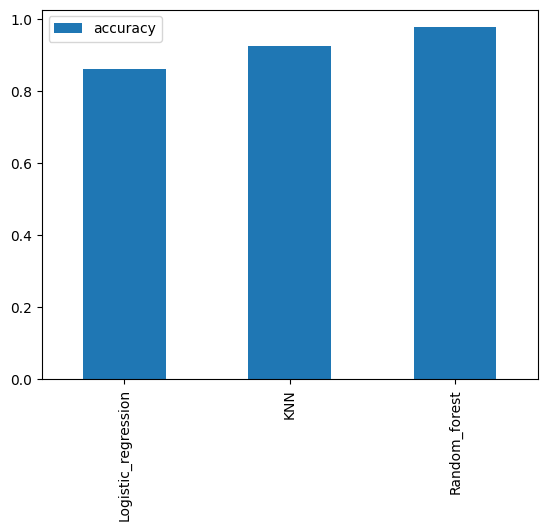

In [18]:
pd.DataFrame(scores,index=['accuracy']).T.plot.bar()

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=model.predict(x_test)

In [24]:
model.score(x_test,y_test)

0.976158038147139

In [25]:
for i in range(100,1500,100):
    model=LogisticRegression(max_iter=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'the score when max itr is {i} is :{model.score(x_test,y_test)}')

the score when max itr is 100 is :0.8603542234332425
the score when max itr is 200 is :0.8637602179836512
the score when max itr is 300 is :0.8658038147138964
the score when max itr is 400 is :0.8678474114441417
the score when max itr is 500 is :0.8664850136239782
the score when max itr is 600 is :0.8658038147138964
the score when max itr is 700 is :0.8664850136239782
the score when max itr is 800 is :0.8678474114441417
the score when max itr is 900 is :0.8658038147138964
the score when max itr is 1000 is :0.8630790190735694
the score when max itr is 1100 is :0.8651226158038147
the score when max itr is 1200 is :0.8603542234332425
the score when max itr is 1300 is :0.8596730245231607
the score when max itr is 1400 is :0.8576294277929155


In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       738
           1       0.85      0.86      0.86       730

    accuracy                           0.86      1468
   macro avg       0.86      0.86      0.86      1468
weighted avg       0.86      0.86      0.86      1468



In [27]:
print(confusion_matrix(y_pred,y_test))

[[631 107]
 [102 628]]


<Axes: >

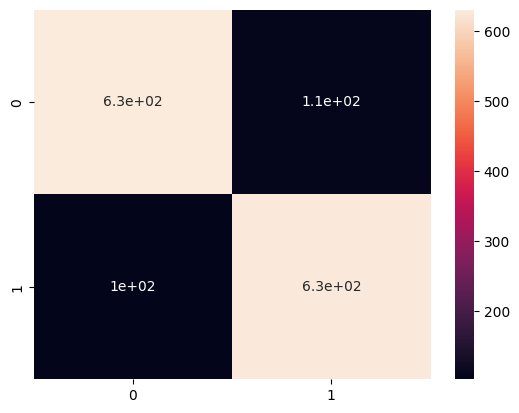

In [28]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_pred,y_test)),annot=True)